In [2]:
import json
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [20]:
STATS_FILE = 'multinomial_stats.json'

all_times = defaultdict(dict)
Ns, Cs, Ss = set(), set(), set()
with open(STATS_FILE, 'r') as f:
    raw_results = json.load(f)
for result in raw_results:
    N, C, S = result['N'], result['C'], result['S']
    Ns.add(N)
    Cs.add(C)
    Ss.add(S)
    for key in result:
        if key in ['N', 'C', 'S']: continue
        all_times[key][(N, C, S)] = result[key]

Ns = sorted(list(Ns))
Cs = sorted(list(Cs))
Ss = sorted(list(Ss))
bounds = (Ns, Cs, Ss)

In [21]:
def get_sequences(all_times, bounds, N=None, C=None, S=None):
    num_none = sum(1 if x is None else 0 for x in [N, C, S])
    assert num_none == 1

    means = defaultdict(list)
    stds = defaultdict(list)

    Ns, Cs, Ss = bounds
    NCSs = []
    if N is None:
        NCSs = [(N, C, S) for N in Ns]
    elif C is None:
        NCSs = [(N, C, S) for C in Cs]
    elif S is None:
        NCSs = [(N, C, S) for S in Ss]

    for key in all_times.keys():
        for NCS in NCSs:
            times = all_times[key][NCS]
            means[key].append(np.mean(times))
            stds[key].append(np.std(times))
        means[key] = np.asarray(means[key])
        stds[key] = np.asarray(stds[key])

    return means, stds

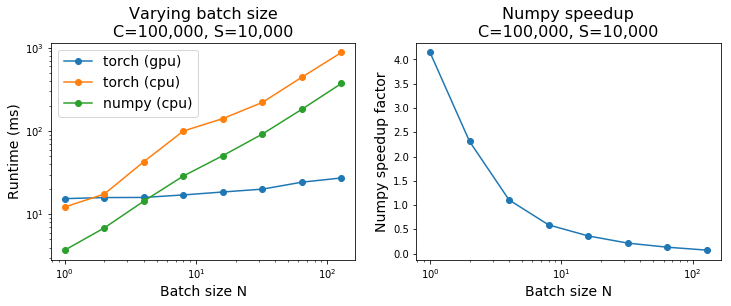

In [22]:
means, stds = get_sequences(all_times, bounds, C=100000, S=10000)

plt.subplot(1, 2, 1)
plt.loglog(Ns, means['torch_gpu'], 'o-', label='torch (gpu)')
plt.loglog(Ns, means['torch_cpu'], 'o-', label='torch (cpu)')
plt.loglog(Ns, means['numpy_cpu'], 'o-', label='numpy (cpu)')
plt.title('Varying batch size\nC=100,000, S=10,000', size=16)
plt.xlabel('Batch size N', size=14)
plt.ylabel('Runtime (ms)', size=14)
plt.legend(fontsize=14)

plt.subplot(1, 2, 2)
numpy_speedup = means['torch_gpu'] / means['numpy_cpu']
plt.semilogx(Ns, numpy_speedup, 'o-', label='Numpy speedup')
plt.title('Numpy speedup\nC=100,000, S=10,000', size=16)
plt.xlabel('Batch size N', size=14)
plt.ylabel('Numpy speedup factor', size=14)

plt.gcf().set_size_inches(12, 4)
plt.savefig('imgs/vary_N.png', bbox_inches='tight')
plt.show()

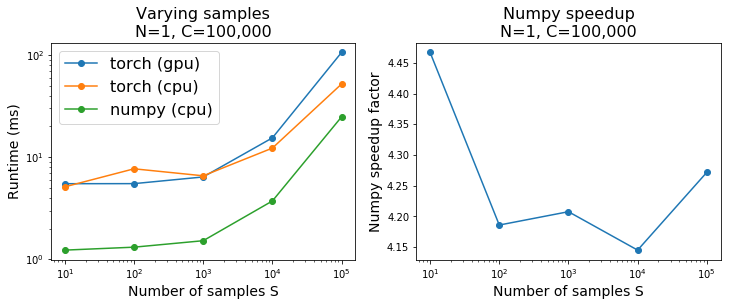

In [23]:
means, stds = get_sequences(all_times, bounds, N=1, C=100000)

plt.subplot(1, 2, 1)
plt.loglog(Ss, means['torch_gpu'], 'o-', label='torch (gpu)')
plt.loglog(Ss, means['torch_cpu'], 'o-', label='torch (cpu)')
plt.loglog(Ss, means['numpy_cpu'], 'o-', label='numpy (cpu)')
plt.title('Varying samples\nN=1, C=100,000', size=16)
plt.xlabel('Number of samples S', size=14)
plt.ylabel('Runtime (ms)', size=14)
plt.legend(fontsize=16)

plt.subplot(1, 2, 2)
numpy_speedup = means['torch_gpu'] / means['numpy_cpu']
plt.semilogx(Ss, numpy_speedup, 'o-', label='Numpy speedup')
plt.title('Numpy speedup\nN=1, C=100,000', size=16)
plt.xlabel('Number of samples S', size=14)
plt.ylabel('Numpy speedup factor', size=14)

plt.gcf().set_size_inches(12, 4)
plt.savefig('imgs/vary_S.png', bbox_inches='tight')
plt.show()

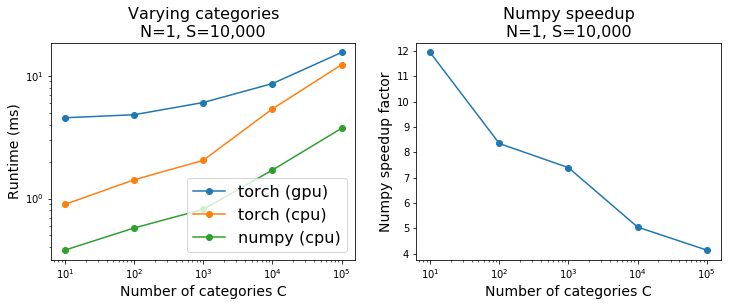

In [24]:
means, stds = get_sequences(all_times, bounds, N=1, S=10000)

plt.subplot(1, 2, 1)
plt.loglog(Cs, means['torch_gpu'], 'o-', label='torch (gpu)')
plt.loglog(Cs, means['torch_cpu'], 'o-', label='torch (cpu)')
plt.loglog(Cs, means['numpy_cpu'], 'o-', label='numpy (cpu)')
plt.title('Varying categories\nN=1, S=10,000', size=16)
plt.xlabel('Number of categories C', size=14)
plt.ylabel('Runtime (ms)', size=14)
plt.legend(fontsize=16)

plt.subplot(1, 2, 2)
numpy_speedup = means['torch_gpu'] / means['numpy_cpu']
plt.semilogx(Cs, numpy_speedup, 'o-', label='Numpy speedup')
plt.title('Numpy speedup\nN=1, S=10,000', size=16)
plt.xlabel('Number of categories C', size=14)
plt.ylabel('Numpy speedup factor', size=14)

plt.gcf().set_size_inches(12, 4)
plt.savefig('imgs/vary_C.png', bbox_inches='tight')
plt.show()